In [1]:
import matplotlib.pyplot as plt
import scanpy as sc
import warnings

warnings.simplefilter(action='ignore')

rc = {"axes.spines.left": False,
      "axes.spines.right": False,
      "axes.spines.bottom": False,
      "axes.spines.top": False,
      "xtick.bottom": False,
      "xtick.labelbottom": False,
      "ytick.labelleft": False,
      "ytick.left": False,
      "xtick.minor.visible": False,
      "xtick.top": False,
      "ytick.right": False,
      'axes.titlesize': 14,
      'legend.title_fontsize': 12,
      'legend.fontsize': 12,
      'axes.labelsize': 12,
      'lines.markersize': 3,
      'legend.markerscale': 2
      }
plt.rcParams.update(rc)

## CASCAT Inputs

In [2]:
adata = sc.read_h5ad('./data/tree1/data.h5ad')
adata

AnnData object with n_obs × n_vars = 1000 × 1051
    uns: 'end_id', 'milestone_network', 'milestone_percentages', 'start_id', 'timecourse'

In [3]:
adata.obs

""
cell1
cell2
cell3
cell4
cell5
...
cell996
cell997
cell998
cell999


## CASCAT Outputs

In [4]:
adata = sc.read_h5ad('result/tree1/data_processed.h5ad')
adata

AnnData object with n_obs × n_vars = 1000 × 1051
    obs: 'cluster', 'cascat_clusters', 'cascat_pseudotime'
    uns: 'CMI', 'DM_EigenValues', 'cascat_connectivities', 'end_id', 'group_frac', 'log1p', 'milestone_network', 'milestone_percentages', 'root', 'start_cell_idx', 'start_id', 'timecourse'
    obsm: 'DM_EigenVectors', 'DM_EigenVectors_multiscaled', 'cascat_embedding'
    obsp: 'DM_Kernel', 'DM_Similarity'

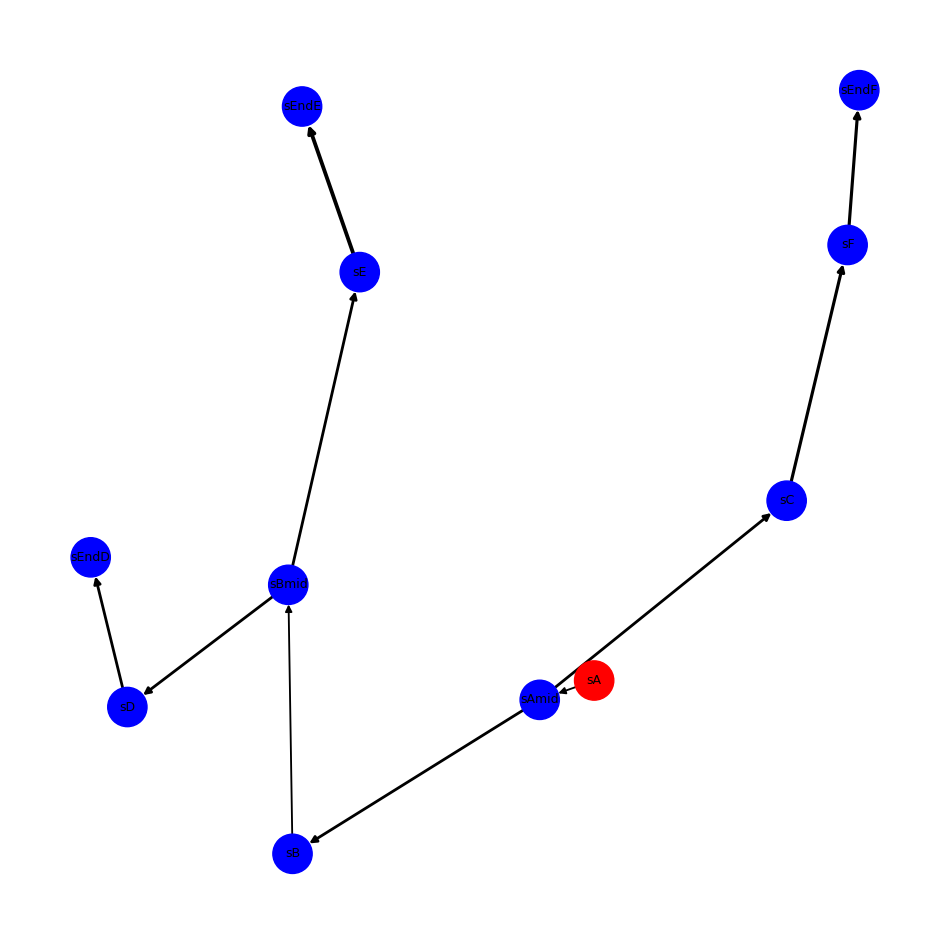

In [5]:
from utils.Plot import plot_gt_milestone_network

plot_gt_milestone_network(adata)

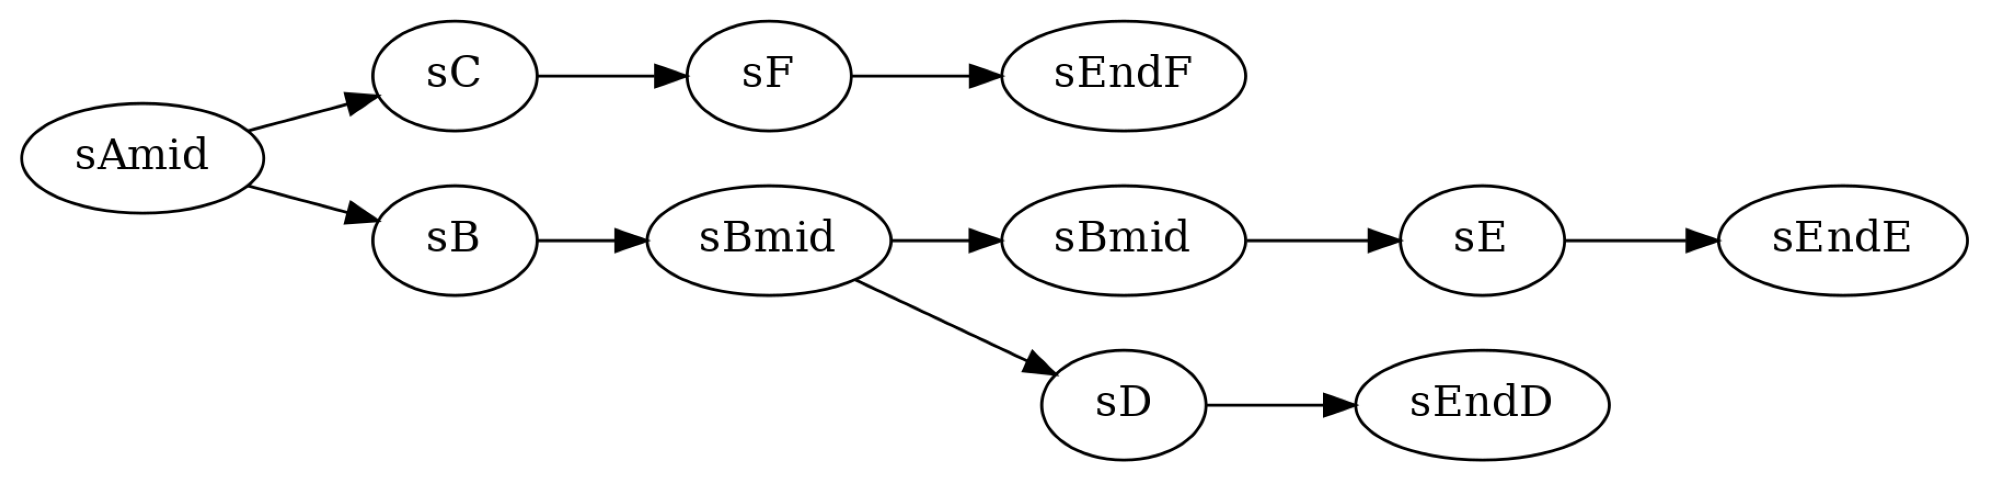

In [6]:
from models.model_utils import *

pesudo_key = 'cascat_pseudotime'
obj = CMIPlot(adata, start_cell_idx=adata.uns['start_id'],
              root=adata.uns['root'], group_frac=adata.uns['group_frac'], save_path='./result/tree1/',
              pesudo_key='cascat_pseudotime', connect_key='cascat_connectivities', predict_key='cascat_clusters',
              emb_key='cascat_embedding')
obj.plot_trajectory_tree()

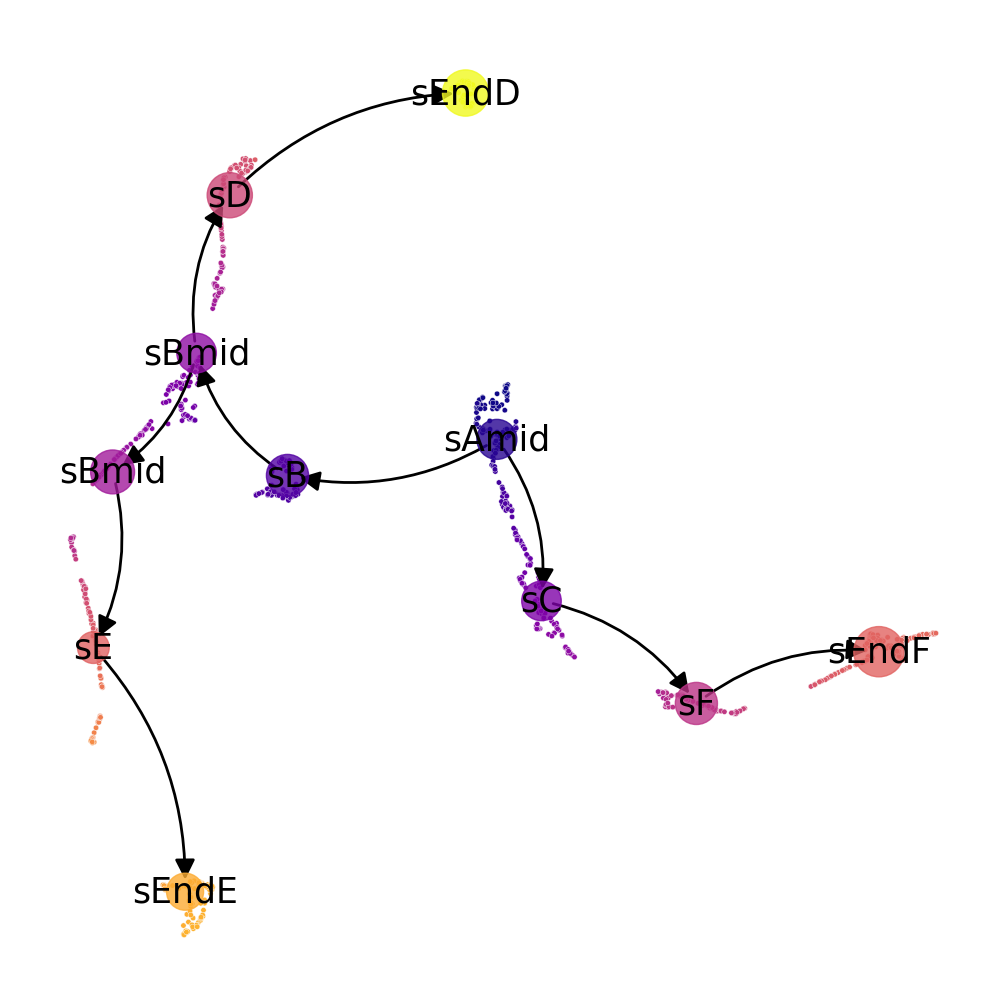

In [7]:
obj.plot_pseudotime()